## **Financial Data Structure**  

This notebook is based on the first chapter of Marcos Lopez de Prado’s book: 
*"Advances in Financial Machine Learning"* - *Financial Data Structures*.  

With regard to data-driven in finance, the important thing is not only what data is available but also how it can be approached. Many advantages given from *Programmatic availability* of data is now disseminated  via application programing interface (APIs) that allow the usage of computer code to do ETL tasks bringing information in financial world. In general, financial data is amorphous, which can come from in many shapes and forms depending on purposes of finance practitioners' use and requirement.  

In the table, structured data refers to numerical data types that often come in tabular structures while unstructured data is represented as standard text that often has no structures (headers, paragraphs, etc). When it comes to market data, which includes all trading activity that takes place in an exchange or trading venue, eg: stock data. This is often shown as historical time-series data in the form of rows referred as "bars".  

#### **What is "bars"?**
The first step to approach any further analysis questions is to aggregate data into a convenient and perspicuous format. Bars is chart illustrations represented most basic 
infomation about changes in value of financial assets, or tendencies of their movements during a specific period.  

#### **Time Bar**  
Time bars are derived from regularly sampling information at a fixed time interval at frequencies of a day, an hour, or even every 15 minutes. They typically are open, close, high, low, volume - historical data structure (usually shortened to OHLCV). Although time bars are one of the most popular among practitioners, series extracted from time-sampled processes often show poor statistical properties such as serial correlation, heteroscedasticity, and non-normality of returns (Easley, Lopez de Prado, and O’Hara [2012]).   

Several examples will be shown below to illustrate behaviors of mentioned bar types. Firstly, historical data of S&P500 including open, close, high, low and volume are collected by **Yahoo Finance API - yfinance** from a 30-day period at a minute interval.

In [1]:
path = '/home/tapivo/learning/Machine_Learning_in_Finance_Reading/Advances_in_Financial_Machine_Learning'
import os
os.chdir(path)

In [2]:
import datetime
import pandas as pd
import numpy as np

import sys
sys.path.insert(1, path+'/ModelConfig')
import loading as load
import algo_structure as al
from algo_structure import AlgoStructure

# from importlib import reload
# reload(al)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio

pio.renderers.default = "svg"

In [3]:
# Initial time set-up 
end_time_date = datetime.date.today() - datetime.timedelta(days=1)
end_time= datetime.datetime.fromordinal(end_time_date.toordinal())
start_time = end_time - datetime.timedelta(days=27)
# Download stock information
df,stock_df = load.scraping_stock("MSFT",start_time, end_time ,"1m")

0  - Date : 2022-12-11 00:00:00
[*********************100%***********************]  1 of 1 completed
1  - Date : 2022-12-17 00:00:00
[*********************100%***********************]  1 of 1 completed
2  - Date : 2022-12-23 00:00:00
[*********************100%***********************]  1 of 1 completed
3  - Date : 2022-12-29 00:00:00
[*********************100%***********************]  1 of 1 completed


In [4]:
# Save information and reload it for the next time

# df.to_csv('stock_raw.csv')
# stock_df.to_csv('stock_data.csv')

df = pd.read_csv(path+'/Chapter02:Financial_Data_Structures/data_save/stock_raw.csv')
stock_df = pd.read_csv(path+'/Chapter02:Financial_Data_Structures/data_save/stock_data.csv')

In [5]:
df.drop(columns='Unnamed: 0', inplace = True)
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-11-03 09:30:00-04:00,220.089996,220.410004,219.279999,219.534897,219.534897,1153534
1,2022-11-03 09:33:00-04:00,219.289902,220.000000,219.220001,219.919998,219.919998,603896
2,2022-11-03 09:34:00-04:00,219.899994,220.029999,219.240005,219.289993,219.289993,216890
3,2022-11-03 09:35:00-04:00,219.240005,219.529999,219.110001,219.205002,219.205002,142302
4,2022-11-03 09:36:00-04:00,219.190002,219.389999,218.615005,218.809906,218.809906,191828


In [6]:
stock_df.drop(columns='Unnamed: 0', inplace = True)
stock_df['Timestamp'] = pd.to_datetime(stock_df['Timestamp'])
stock_df.head()

,Timestamp,Open,High,Low,Close,Adj Close,Volume
0,2022-11-03 09:30:00,220.089996,220.410004,219.279999,219.534897,219.534897,1153534
1,2022-11-03 09:33:00,219.289902,220.000000,219.220001,219.919998,219.919998,603896
2,2022-11-03 09:34:00,219.899994,220.029999,219.240005,219.289993,219.289993,216890
3,2022-11-03 09:35:00,219.240005,219.529999,219.110001,219.205002,219.205002,142302
4,2022-11-03 09:36:00,219.190002,219.389999,218.615005,218.809906,218.809906,191828


In [7]:
stock_df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Volume weighted average price is the average price of a stock weighted by the total trading volume. This technical analysis indicator is often used to calculate the price average of a stock over a period of time. To deeply understand what VWAP is, please check [this definition](https://www.investopedia.com/terms/v/vwap.asp). The plot below displays Time bar of S&P500 VWAP. We initially use the *volume weighted average price (VWAP)* for chart illustrations.

In [8]:
# stock_grp = stock_df.groupby(pd.Grouper(freq = '3Min'))
data_time_vwap = AlgoStructure.vwap_cal(stock_df)
data_vwap_3min = data_time_vwap.groupby(pd.Grouper(freq = '3Min')).mean()
data_vwap_3min = data_vwap_3min.reset_index(drop=False)

# for i in range(0, len(data_time_vwap), 3):
#     data_vwap_3min = data_vwap_3min.append(data_time_vwap.iloc[[i]])

data_vwap_3min.head()

,Timestamp,index,Open,High,Low,Close,Adj Close,Volume,Typical_price,Vwap
0,2022-11-03 09:30:00,0.0,220.089996,220.410004,219.279999,219.534897,219.534897,1.153534e+06,219.741633,219.741633
1,2022-11-03 09:33:00,2.0,219.476634,219.853333,219.190002,219.471664,219.471664,3.210293e+05,219.505000,219.706821
2,2022-11-03 09:36:00,5.0,218.939997,219.176666,218.540003,218.897303,218.897303,1.425610e+05,218.871324,219.582237
3,2022-11-03 09:39:00,8.0,219.158936,219.495331,218.939997,219.318370,219.318370,1.463637e+05,219.251233,219.516226
4,2022-11-03 09:42:00,11.0,218.927200,218.962199,218.349996,218.440002,218.440002,1.648810e+05,218.584066,219.432872


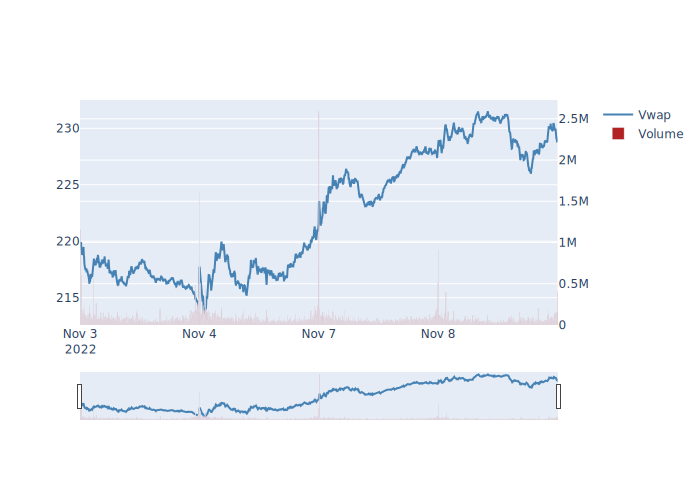

In [9]:
# data_time_vwap.reset_index(drop = False, inplace=True)
fig = make_subplots(specs=[[{"secondary_y": True}]])
# df_plot = data_time_vwap.copy()
colors = {'A':'steelblue',
          'B':'firebrick'}
stock_df.reset_index(drop=False, inplace=True)
fig.add_trace(go.Scatter(x=stock_df['Timestamp'],y=stock_df['Close'],name='Vwap',marker_color=colors['A']),secondary_y=False)
# Add trade volume each timestamp
fig.add_trace(go.Bar(x=stock_df['Timestamp'],y=stock_df['Volume'],name='Volume',marker_color=colors['B']),secondary_y=True)

fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            dict(bounds=["2022-10-12 16:00:00","2022-10-13 9:30:00"]),
            dict(bounds = ["2022-10-15 16:0:00", "2022-10-17 11:42:00"])
        ]
    )
# fig.update_traces(color='red')
fig.show()

However, it is the fact that information from markets is not exposed uniformly at random, which means it does not follow uniform distribution over time. Therefore, time-bars over-sample low activity periods and under-sample high activity periods (activities maybe understood as changing in prices).

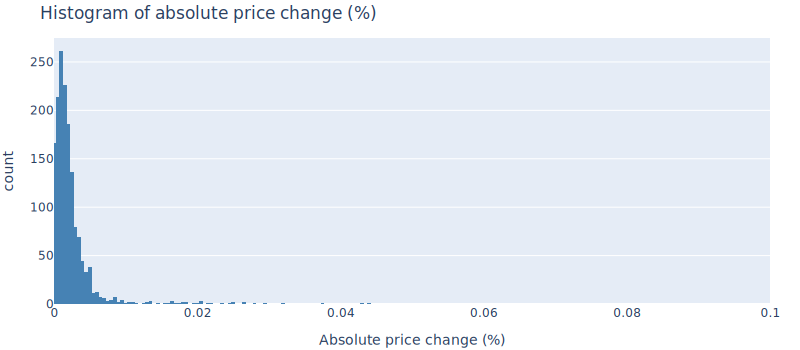

In [10]:
data_time_vwap.reset_index(drop = False, inplace=True)
abs_price = abs(AlgoStructure.cal_prchanges(data_time_vwap['Vwap']))
abs_price = pd.DataFrame(abs_price)
abs_price.reset_index(drop = False, inplace = True)

fig = px.histogram(abs_price, x="Vwap",
                  title = 'Histogram of absolute price change (%)',
                  labels = {'Vwap':'Absolute price change (%)'},
                  color_discrete_sequence  = [colors['A']])

fig.update_layout(
        width=800,height=350,
        margin=dict(l=30, r=30, t=38, b=5)
            )
fig.update_layout(xaxis_range=[0,0.1])
fig.show()

As we can see, the majority of 5-minute activities show price changes below 0.5%; the largest part of them experiencing slight changes with the peak at around 0.0025%–0.007%. This actually not an effective input source for training any Machine Learning-based algorithm model because of the fact that there is no changes or features to learn. 

Statistical methods often rely on assumptions like non-serial correlation, homogeneity of variances or normality of returns distribution. Therefore, those poor properties confirm that time bar is not a good data format for machine learning algorithms.   

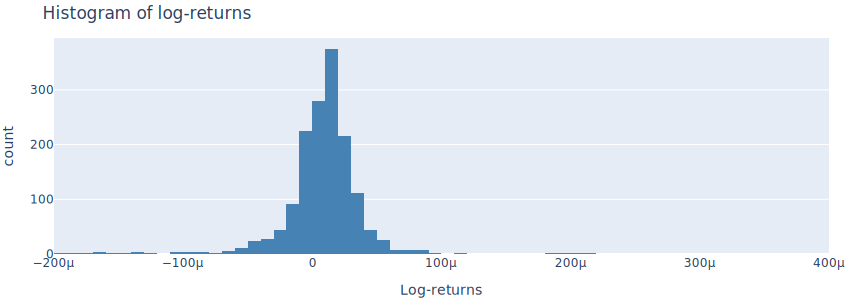

In [11]:
time_bars, time_returns = AlgoStructure.cal_returns(data_time_vwap['Vwap'].astype(float))
time_bars = pd.DataFrame(time_bars)
time_bars.reset_index(drop = False, inplace = True)

fig = px.histogram(time_bars, x="Vwap",
                  title = 'Histogram of log-returns',
                  labels = {'Vwap':'Log-returns'},
                  color_discrete_sequence  = [colors['A']],
                  nbins = 200)
fig.update_layout(
        width=850,height=300,
        margin=dict(l=5, r=5, t=38, b=5)
            )
fig.update_layout(xaxis_range=[-0.0002,0.0004])

fig.show()

It is not really normal but left-skewed. 

### **Tick Bar**  
Tick bar or candlestick bar is an ubiquitous charting method used in market analysis, especially traders. Candlestick bar chart is a combination of many single candlesticks following a period of time. Two common definitions describing a tick are:  

- A tick is a measure of the minimum upward or downward movement in the price of a security or refer to the change in the price of a security from trade to trade.  

- A tick bar or a tick candle is the aggregation of a predefined number of ticks; in other words, each vertical line on the chart (a tick) represents the high and low for the given trading period. For instance, 100-tick bars can be generated by calculating the Open, High, Low, Close, and Volume values of 100 consecutive actual trades from the exchange.



<!-- ![**Figure 1: Candleticks**](https://learnpriceaction.com/wp-content/uploads/2018/05/Webp.net-resizeimage-10.png) -->
<img src="https://learnpriceaction.com/wp-content/uploads/2018/05/Webp.net-resizeimage-10.png" align="center"/>

A candlestick show two main parts:  

**- A real body**: The rectangle shape of the tick, often be called "real body". This part represents the open  and close price of a trading period.  
If the close is higher than the open, the real body will be white or green, which witnesses increasing prices (the market is bullish); meanwhile if the open is higher than the close,the real body will be black or red, which shows decreasing prices (the market is bearish).  

**-Upper/Lower shadows**: the both shadows are the lines above the real body, and represents the highest/lowest value for the trading period.

In [12]:
tick = data_time_vwap.copy()
# tick.reset_index(drop=False, inplace=True)
stick = AlgoStructure.generate_tickbars(tick,frequency=10)
df_tick = pd.DataFrame(stick, columns = ['Timestamp','Open','High','Low','Close','Volume'])
df_tick['Timestamp'] = df_tick['Timestamp'].apply(lambda t: load.floatotime(t))
df_tick.head()

,Timestamp,Open,High,Low,Close,Volume
0,2022-11-03 09:41:00,219.534897,219.919998,218.809906,219.490005,10.0
1,2022-11-03 09:51:00,218.764999,218.764999,217.250000,217.250000,10.0
2,2022-11-03 10:01:00,217.339996,217.464996,216.229996,216.751404,10.0
3,2022-11-03 10:11:00,216.391006,217.369995,216.391006,217.369995,10.0
4,2022-11-03 10:21:00,217.649994,218.459900,217.639999,217.860001,10.0


In [13]:
# def bar(x, y):
#     return np.int64(x/y)*y
# trade.groupby(bar(np.cumsum(trade['Volume']), 1000)).agg({'Close': 'ohlc', 'Volume': 'sum'})

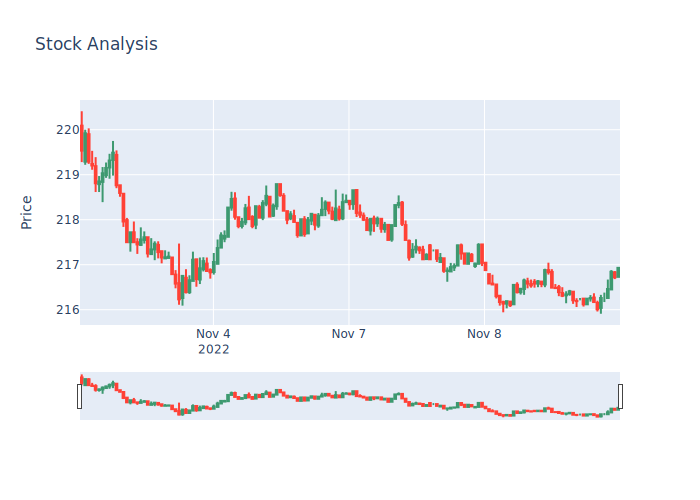

Number of ticks during the period: 1554


In [14]:
fig = go.Figure(data=[go.Candlestick(x=df_tick['Timestamp'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])]
                )
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            dict(bounds=["2022-10-12 15:59:00","2022-10-13 9:30:00"]),
            dict(bounds = ["2022-10-15 15:59:00", "2022-10-17 11:42:00"])
        ]
    )
fig.update_layout(
        title='Stock Analysis',
        yaxis_title='Price'
    )
fig.show()
print(f'Number of ticks during the period: {df.shape[0]}')

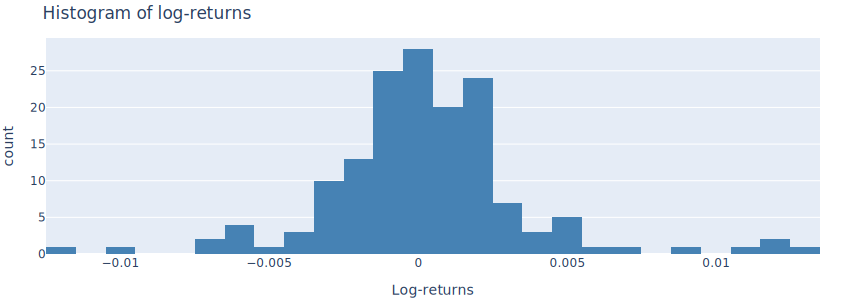

In [15]:
tick_bars, tick_returns = AlgoStructure.cal_returns(df_tick['Close'])
tick_bars = pd.DataFrame(tick_bars)
tick_bars.reset_index(drop = False, inplace = True)

bin_len = 8
fig = px.histogram(tick_bars, x="Close",
                  title = 'Histogram of log-returns',
                  labels = {'Close':'Log-returns'},
                  color_discrete_sequence  = [colors['A']],
                  nbins=len(np.arange(min(df_tick['Close']),
                                    max(df_tick['Close'])+bin_len, bin_len)))

fig.update_layout(
        width=850,height=300,
        margin=dict(l=5, r=30, t=38, b=5)
            )
            
fig.show()

In [16]:
trade = data_time_vwap.copy()
trade_df = AlgoStructure.generate_volumebars(trade,frequency=5)
trade_df = pd.DataFrame(trade_df, columns = ['Timestamp','Open','High','Low','Close','Volume'])
trade_df['Timestamp'] = trade_df['Timestamp'].apply(lambda t: load.floatotime(t))
trade_df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2022-11-03 09:36:00,219.534897,219.919998,218.809906,218.809906,2308450.0
1,2022-11-03 09:41:00,218.850006,219.490005,218.850006,219.490005,674946.0
2,2022-11-03 09:46:00,218.764999,218.764999,217.500000,217.720001,751925.0
3,2022-11-03 09:51:00,217.500000,217.610001,217.250000,217.250000,527100.0
4,2022-11-03 09:56:00,217.339996,217.464996,217.160004,217.164993,490293.0


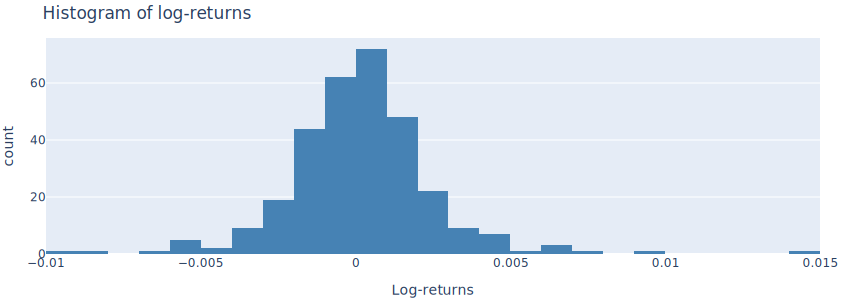

In [17]:
trade_bars, volume_returns = AlgoStructure.cal_returns(trade_df['Close'])
trade_bars = pd.DataFrame(trade_bars)
trade_bars.reset_index(drop = False, inplace = True)

bin_len = 5
fig = px.histogram(trade_bars, x="Close",
                  title = 'Histogram of log-returns',
                  labels = {'Close':'Log-returns'},
                  color_discrete_sequence  = [colors['A']],
                  nbins=len(np.arange(min(df_tick['Close']),
                                    max(df_tick['Close'])+bin_len, bin_len)))
fig.update_layout(
        width=850,height=300,
        margin=dict(l=5, r=30, t=38, b=5)
            )
fig.show()

# Statistical Properties

### **Serial correlation**

Serial correlation (Auto-correlation) measures the extent of a linear relationship between two variables. In the context of time series, serial correlation weights how much one value of each time point of the time series correlates with the following one (lag = 1) or any further previous ones (lag = n).  

The common test for serial correlation is ACF plot showing auto-correlation coefficients. There is often a threshold 0.5 assuming an emergence of correlation between t and t-1 or between t and t-n (AR(1) or AR(n) models).

In [18]:
bar_returns = [time_returns,tick_returns,volume_returns]

In [19]:
bar_types = ['time','tick','volume']
autocorrs = AlgoStructure.get_test_stats(bar_types,bar_returns,pd.Series.autocorr)
autocorrs.sort_values('autocorr_stat')

,sample_size,autocorr_stat
tick,155.0,-0.151238
volume,310.0,-0.096945
time,1553.0,0.643228


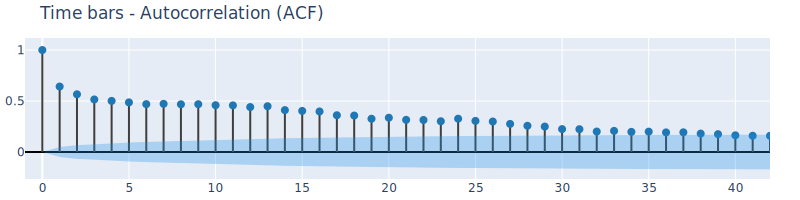

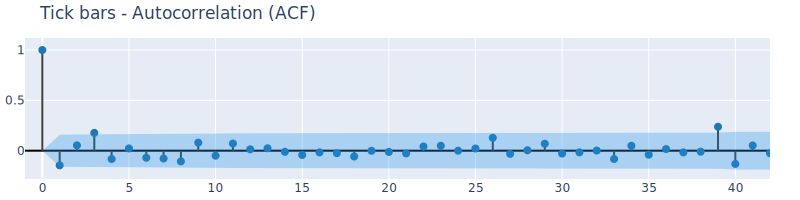

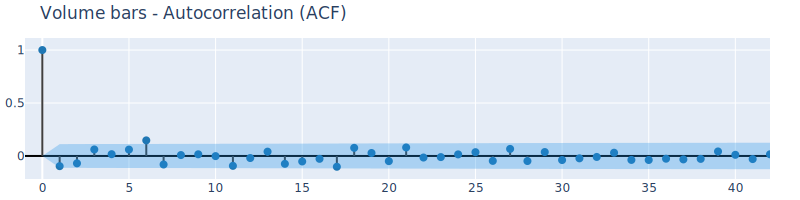

In [20]:
AlgoStructure.create_corr_plot('Time bars',time_returns)
AlgoStructure.create_corr_plot('Tick bars',tick_returns)
AlgoStructure.create_corr_plot('Volume bars',volume_returns)

Time bars show high auto-correlation from the next previous one until the next 20 lags.

**What are the issues?**  
  
Macros Lopez de Prado also points out in the book that Time samples data has weak properties:
- Oversampling information from low-activity periods, but under-sampling information from high-activity periods. 
- Poor statistical properties:  

    * Serial correlation (lag) which has high correlation of itself in a delayed timestamp  
      
    * Heteroskedasticity when the timeseries witnessed changes in its variance/errors overtime  
     
    * Finally, non-normality of returns

**References:**  

López de Prado, Marcos and López de Prado, Marcos, Advances in Financial Machine Learning (Chapter 1, Chapter 2) (January 18, 2018). Advances in Financial Machine Learning, Wiley, 1st Edition (2018), ISBN: 978-1-119-48208-6  

github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/issues/1  

towardsdatascience.com/financial-machine-learning-practitioners-have-been-using-the-wrong-candlesticks-heres-why-7a3fb85b5629  

www.sefidian.com/2021/06/12/introduction-to-advanced-candlesticks-in-finance-tick-bars-dollar-bars-volume-bars-and-imbalance-bars/  